In [1]:
import numpy as np
import pandas as pd
%pylab inline
df = pd.read_csv('ESLmixture.csv')
df.head()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


,Unnamed: 0,x.1,x.2,y
0,1,2.526093,0.321050,0
1,2,0.366954,0.031462,0
2,3,0.768219,0.717486,0
3,4,0.693436,0.777194,0
4,5,-0.019837,0.867254,0


In [58]:
X = df[['x.1','x.2']].to_numpy()
y = df[['y']].to_numpy()
y = y.reshape(1,-1)
int(y[:,101])

1

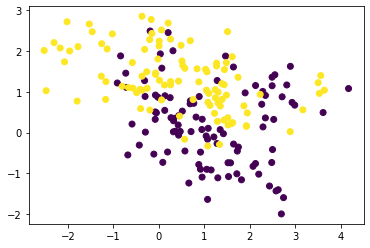

In [8]:
scatter(X[:,0],X[:,1],c = y)

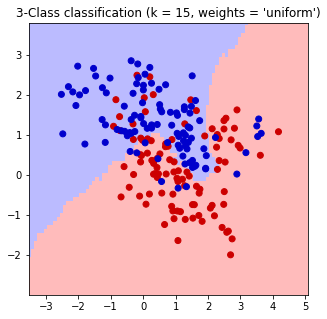

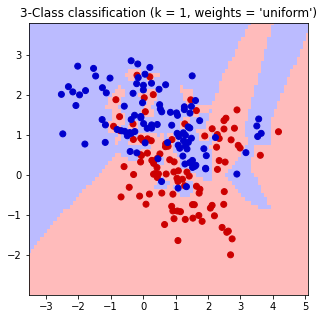

In [68]:
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
import math
#given the coordinate of x, output a value
def knn_strategy(x_2d, k,y):
    y = y.reshape(1,-1)
    distance = []
    for i in range(0,200):
        distance.append(math.sqrt((x_2d[0]-X[i,0])**2+(x_2d[1]-X[i,1])**2))
    df = pd.DataFrame(data = {'distance':distance})
    df = df.sort_values(by = 'distance')
    index_list = df.index.values.tolist()[:k]
    value_of_y = []
    for i in index_list:
        value_of_y.append(int(y[:,i]))
    if np.mean(value_of_y)>=0.5:
        return 1
    else:
        return 0
    
    #index_no = df.columns.get_loc('distance')
    #print(index_no)
         
knn_strategy([2,2], 15, y)
# Create color maps
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:,:2]  # we only take the first two features
#y = iris.target

h = 0.1 # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

weights = 'uniform'
for n_neighbors in [15,1]:   
    # we create an instance of Neighbours Classifier and fit the data.
    Z = []
    for i in grid:
        Z.append(knn_strategy(i,n_neighbors,y))
    # Put the result into a color plot
    Z=np.array(Z)
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

25

/Users/shoufumisakai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/shoufumisakai/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


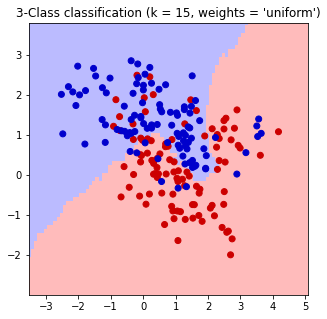

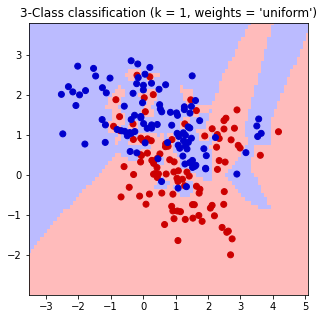

In [3]:
# Create color maps
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])
df = pd.read_csv('ESLmixture.csv')
X = df[['x.1','x.2']].to_numpy()
y = df[['y']].to_numpy()
# import some data to play with
#iris = datasets.load_iris()
#X = iris.data[:,:2]  # we only take the first two features
#y = iris.target

h = 0.1 # step size in the mesh

# Points in a mesh of [x_min, m_max] x [y_min, y_max]
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

weights = 'uniform'
for n_neighbors in [15,1]:   
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    Z = clf.predict(grid)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

###Question3

In [13]:
##a)
from numpy.linalg import inv
x = np.random.uniform(0,3,200)
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 200)
Y = 4+3*x+s
X = np.zeros((200,2))
X[:,0]=1
X[:,1]=x

In [14]:
##b
beta_hat = np.matmul(inv(np.matmul(X.T, X)),np.matmul(X.T, Y))
beta_hat

array([3.98799664, 2.96617678])

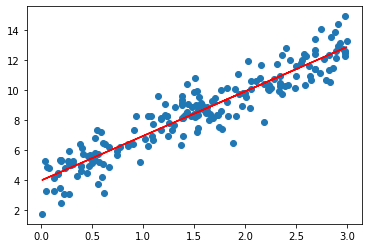

In [15]:
##c)
f = beta_hat[0]+beta_hat[1]*x
scatter(x, Y)
plt.plot(x, f, color ='r')


beta0 3.987996639082673
beta1 2.9661767780968376


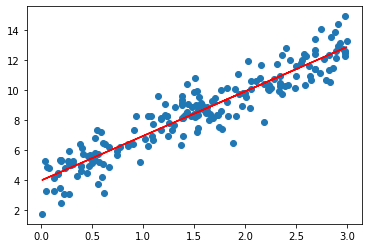

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
beta0=reg.intercept_
beta1=reg.coef_[1]
print("beta0",reg.intercept_)
print("beta1",reg.coef_[1])
f2 = beta0+beta1*x
scatter(x, Y)
plt.plot(x, f2, color ='r')